In [1]:
# The validation curve for polynomial regression model

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


In [3]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [4]:
# Now lets create some data to which will fit our model

In [5]:
import numpy as np

In [6]:
def make_data(N, err=1.0, rseed=1):
    # Randomly sample the data
    rng = np.random.RandomState(rseed)
    x = rng.rand(N,1)**2
    y = 10 - 1./(x.ravel() + 0.1)
    if err>0:
        y += err*rng.randn(N)
    return x,y
x,y = make_data(40)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_theme()

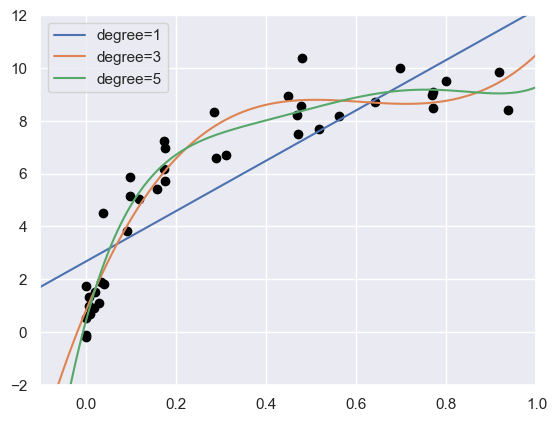

In [10]:
x_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(x.ravel(), y, color='black')
axis = plt.axis()
for degree in [1,3,5]:
    y_test = PolynomialRegression(degree).fit(x,y).predict(x_test)
    plt.plot(x_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')

In [11]:
# Doing the same thing using validation curve routine by scikit-learn

In [13]:
from sklearn.model_selection import validation_curve

In [15]:
degree = np.arange(0,21)
train_score, val_score = validation_curve(PolynomialRegression(), x,y, param_name='polynomialfeatures__degree', param_range=degree, cv=7)


Text(0, 0.5, 'score')

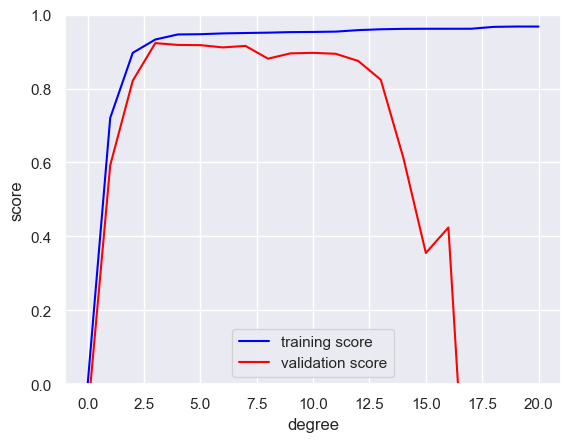

In [16]:
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')


In [17]:
# This shows precisely the qualitative behaviour we expect, the training score is everywhere higher than the evaluation score, the training
# score is monotonically improving with increased model complexity, and the validation score reaches a maximum before dropping as the mode'
# becomes overfit

In [18]:
# From the validation curve we can read off that the optimal trade off between bias and variance is found for a third order polynomial
# we can compute and display this over the original data as follows

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

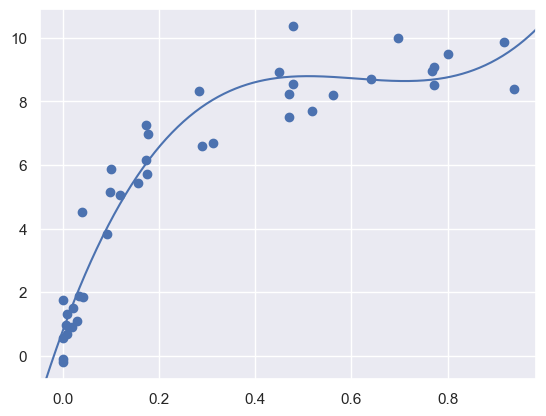

In [19]:
plt.scatter(x.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(x,y).predict(x_test)
plt.plot(x_test.ravel(), y_test)
plt.axis(lim)

In [20]:
# Notice that finding this model did not actually require us to compute the training score
# but examining the relationship between training score and validation score can give us useful
# insight into the performance of the model

In [21]:
# LEARNING CURVES

In [22]:
# One important aspect of the model complexity is that the optimal model will generally depend on the size of
# your training data . e.g lets generate a new dataset with a factor of five more points

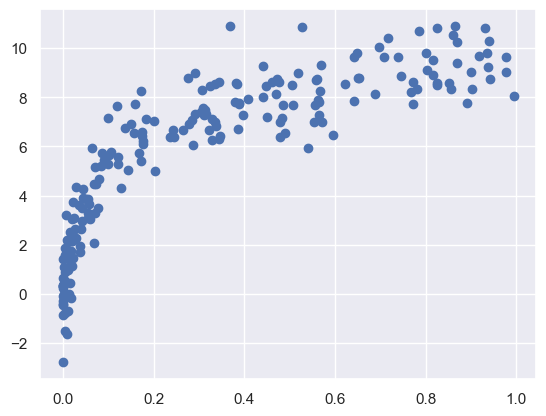

In [23]:
x2, y2 = make_data(200)
plt.scatter(x2.ravel(), y2)

In [24]:
# we will duplicate the preceding code to plot the validation curve for this larger data set for ref
# lets overplot the previous result as well

In [26]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), x2, y2, param_name='polynomialfeatures__degree', param_range=degree, cv=7)

Text(0, 0.5, 'score')

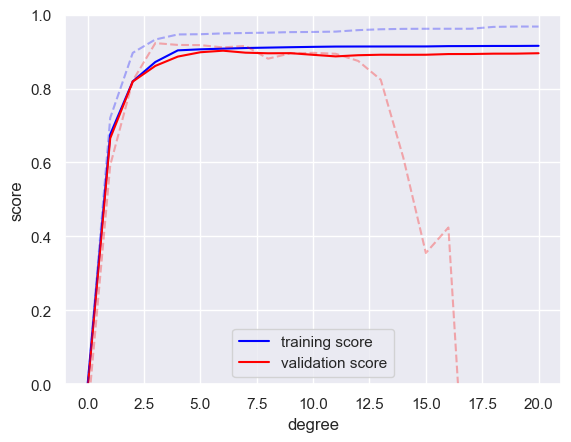

In [28]:
plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')

In [29]:
# It is clear that the larger dataset can support much more complicated model

In [31]:
# Thus behaviour of validation curve has not one but 2 important inputs
# 1. Model complexity
# 2. Number of training points

In [32]:
# A plot of the training and validation score with respect to the size of training set is known as learning curve

In [33]:
# The general behaviour that we expect from a learning curve is as follows
# 1. A model of a given complexity will overfit a small dataset: this means the training score will be
    # relatively high, while the validation score will be relatively low
# 2. A model of a given complexity will underfit a large dataset: this means the training score will decrease
    # but the validation score will increase
# 3. A model will never except by chance give a better score to the validation set than the training set
    # this means the curves should keep getting closer together but never cross

Learning curves in scikitlearn

In [36]:
# compute a learning curve for our original dataset with a second order polynomial model and a ninth order polynomial
# scikit offers a convinient utility for such learning curves

In [37]:
from sklearn.model_selection import learning_curve

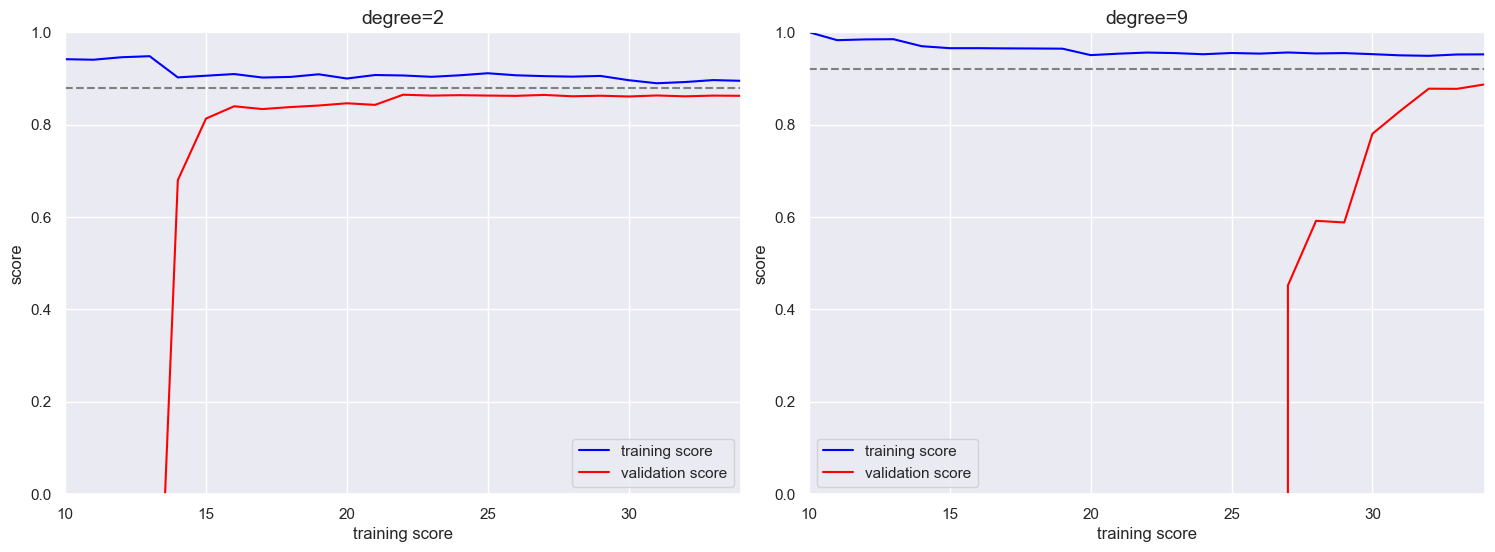

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), x , y, cv=7, train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training score')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree={0}'.format(degree), size=14)
    ax[i].legend(loc='best')

In [43]:
# This is a valuable diagnostic as it depicts how our model responds to increasing training data
# If we add more data points the learning curve for the more complicated model will eventually converge

In [44]:
#Validation in practice : Grid search

In [45]:
# Models generally have more than one knob to turn, and thus plots of validation and learning curves change from lines to multidimensional surfaces
# In these cases, such visualizations are difficult and we would rather simply find the particular model that maxmizes the score

In [46]:
# Below is an example of grid search to find the optimal polynomial model.
# We will explore a 3 dimensional grid of  model  features namely the polynomial degree, the flag telling us wether to fit the intercept
# and the flag telling us wether to normalize the problem

In [47]:
from sklearn.model_selection import GridSearchCV

In [55]:
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False]}

In [56]:
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [57]:
grid.fit(x,y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [58]:
grid.best_params_

{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 4}

In [59]:
# Finally we can use the best model and show the fit, to our data

In [60]:
model = grid.best_estimator_

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

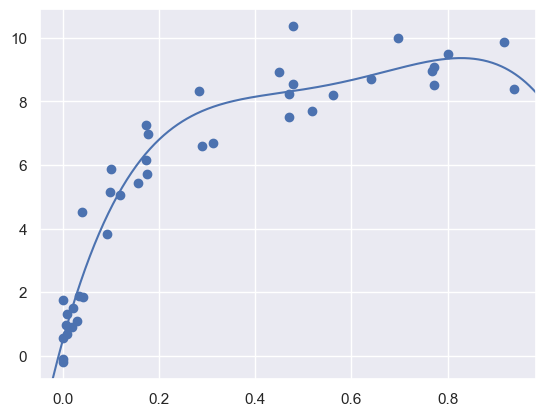

In [62]:
plt.scatter(x.ravel(), y)
lim = plt.axis()
y_test = model.fit(x, y).predict(x_test)
plt.plot(x_test.ravel(), y_test)
plt.axis(lim)

In [ ]:
# We have just begun to explore the concept of model validation and hyper-parameter optimization
# focusing on the intuitive aspects of the bias-variance tradeoff and how it comes into play
# when fitting models to data
# 